<a href="https://colab.research.google.com/github/Josh-XS/Wine-Rating/blob/main/Wine_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wine Rating

Joshua Nickell

Spanish Wine Quality Dataset

1. fedesoriano. (April 2022). Spanish Wine Quality Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset

2. This is a set of over 7000 different types of wine and their various features.

3. The rating of the wine is the target.

4. One row represents a type of wine.

5. This is a classification problem.

6. There are 11 features.

7. There are 7500 rows.

8. I do not forsee any particular challenges working with this dataset.

##Loading Data

In [505]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import make_pipeline

from sklearn import set_config
set_config(display='diagram')

In [506]:
#create and view dataframe
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRa6lJH575jdYrbRzM7BW8DvaY8hfID6AVfML_1RhmrBwkIXKuXn-yrm9ascN0QuOg4NObA4TnIIyQc/pub?gid=2015400164&single=true&output=csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [507]:
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [508]:
df.shape

(7500, 11)

##Cleaning the Data

First I will copy the data for exploration, so that I don't overwrite the original.

In [509]:
#copy the data for exploration
eda_df = df.copy()

###Unnessecary Columns

Then I will drop the 'country' column becasue all of the wines are from Spain, and this will not affect the data.

In [510]:
#drop unnessecary columns
eda_df.drop(columns = 'country', inplace = True)

In [511]:
eda_df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


###Duplicate Columns

I will now check for any duplicate rows.

In [512]:
#check for duplicates
eda_df.duplicated().sum()

5452

There are 5452 duplicate rows

In [513]:
eda_df.shape

(7500, 10)

In [514]:
#drop duplicates
eda_df.drop_duplicates(inplace = True)

In [515]:
eda_df.shape

(2048, 10)

All duplicates have been dropped and there are now 2048 rows.

###Missing Values

Now I will check for missing values.

In [516]:
#check for missing values
eda_df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

Because there were over 5000 duplicate rows dropped, I will not drop any missing values to keep as much data as possible.

I will create a loop to get the value counts of all of the columns so that I can find the most common values for each column, and check for any inconsistencies.

In [517]:
#loop to get all value counts
cols = eda_df.dtypes.index

for col in cols:
  print(f'- {col}:')
  print(df[col].value_counts(dropna=False))
  print("\n\n")

- winery:
Contino                                 457
Artadi                                  261
La Rioja Alta                           254
Sierra Cantabria                        237
Matarromera                             232
                                       ... 
Briego                                    1
Guillem Carol - Cellers Carol Valles      1
Particular                                1
Bodegas Asenjo & Manso                    1
Joan Simo                                 1
Name: winery, Length: 480, dtype: int64



- wine:
Reserva                         467
Gran Reserva                    458
Rioja Reserva                   240
El Viejo                        224
Corimbo I                       223
                               ... 
4 Varietales Coleccion Rioja      1
Noble                             1
Primordium                        1
Finca Helena                      1
Capricho Crianza                  1
Name: wine, Length: 847, dtype: int64



- year:
2011    11

The most common values seem to be much more common than the other values, so I will fill in the missing values with the most common in their column.

In [518]:
#fill missing values
eda_df.fillna({"year":2011, "type": 'Rioja Red', "body": 4.0, "acidity":3.0}, inplace = True)

In [519]:
eda_df.isna().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

There are no more missing values.

The loop also showed that there are no inconsistncies in the dataset.

##Exploring the Data

I will now get the data types of the values and try to find useful information in the numerical columns.

In [520]:
#get data types
eda_df.dtypes

winery          object
wine            object
year            object
rating         float64
num_reviews      int64
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

###Histplots

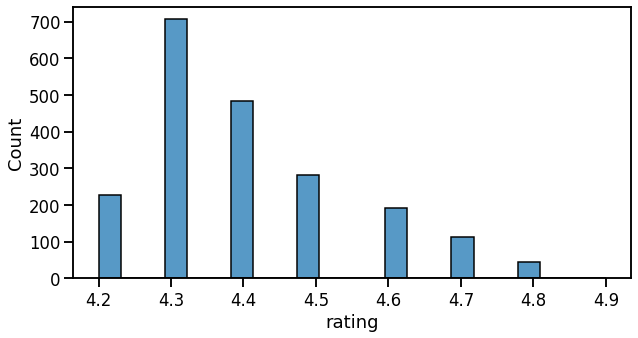

In [521]:
sns.histplot(data = eda_df['rating'])

It seems that the highest rating by far is 4.3, and counts seem to go down as rating goes up.

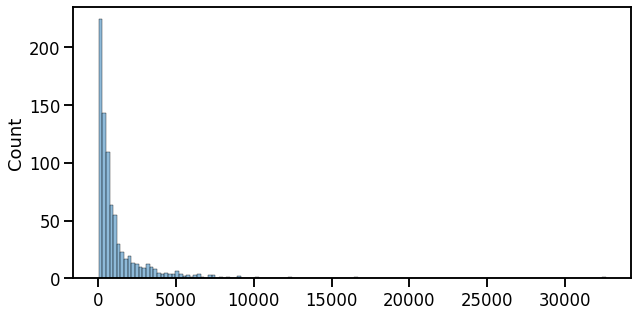

In [522]:
plt.rcParams["figure.figsize"] = (10, 5)
sns.histplot(data = eda_df.groupby(by='num_reviews')['type'], bins='auto', legend=False)

It seems that a majority of the wines have under 500 reviews, with some having as many as 30000.

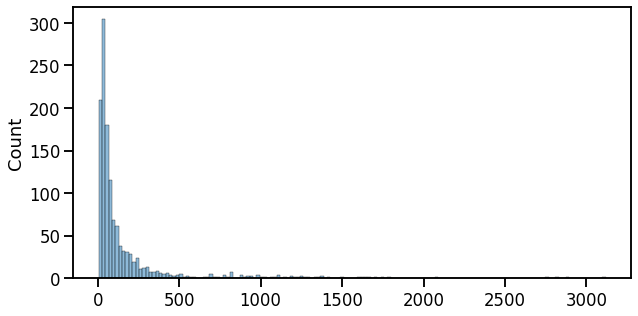

In [523]:
plt.rcParams["figure.figsize"] = (10, 5)
sns.histplot(data = eda_df.groupby(by='price')['type'], bins='auto', legend=False)

Most of the wines cost under 100 dollars, but there are some outliers, the largest being around 3000 dollars.

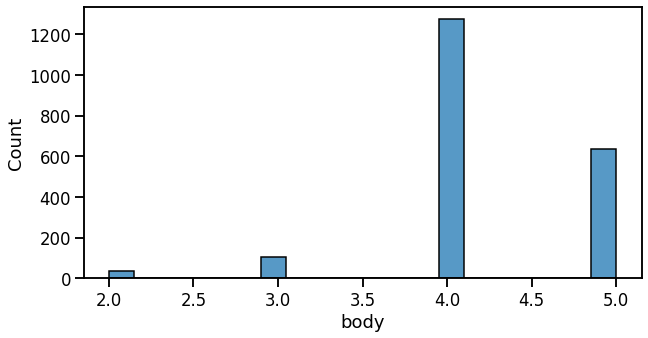

In [524]:
sns.histplot(data = eda_df['body'])

It seems most wines have a body of 4.0, with 5.0 wines being roughly half the amount. Very few wines have a body of 2.0 and 3.0.

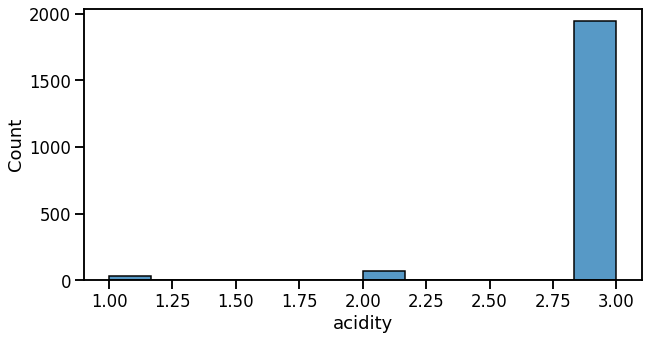

In [525]:
sns.histplot(data = eda_df['acidity'])

Almost all wines have an acidity around 3.00. The other numbers are almost negligible.

###Heatmap

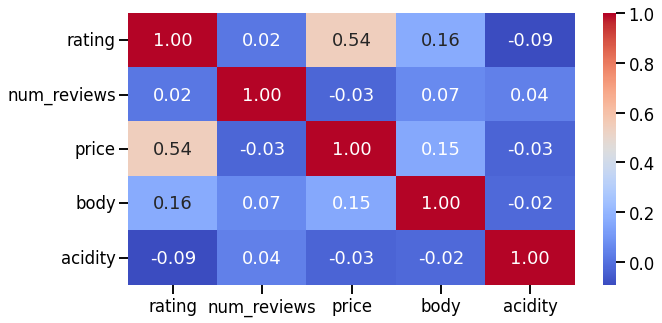

In [526]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

This heat map shows that price seems to have the most affect on a wines rating.

##Explaining the Data

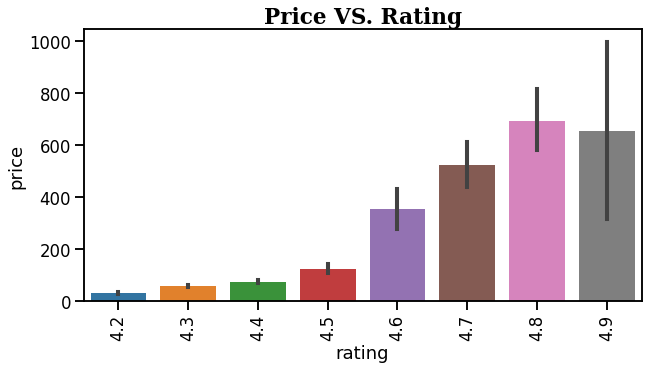

In [527]:
#create scatterplot and title
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(data = eda_df, x = 'rating', y = 'price')
sns.set_context('talk')
ax.set_title('Price VS. Rating',
             fontfamily = 'serif',
             fontsize = 'large', 
             fontweight = 'semibold');
plt.xticks(rotation = 90)

#change x and y axis font
ax.set_xlabel(ax.xaxis.get_label().get_text(),
    fontsize='medium')
ax.set_ylabel(ax.yaxis.get_label().get_text(),
    fontsize='medium')

plt.savefig('Price_vs_Rating.png')

According to this bargraph, there is a clear postive correlation between rating and price. As the price goes up, so does the rating.

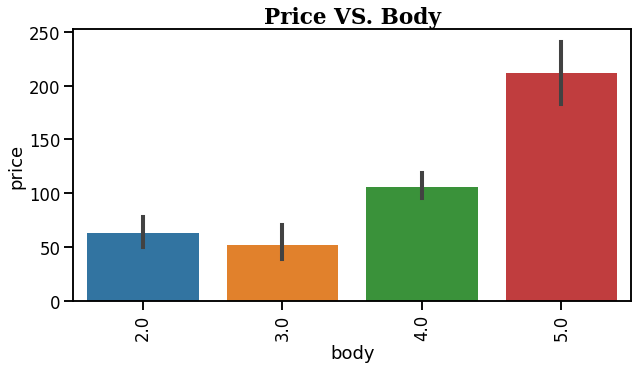

In [528]:
#create scatterplot and title
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(data = eda_df, x = 'body', y = 'price')
sns.set_context('talk')
ax.set_title('Price VS. Body',
             fontfamily = 'serif',
             fontsize = 'large', 
             fontweight = 'semibold');
plt.xticks(rotation = 90)

#change x and y axis font
ax.set_xlabel(ax.xaxis.get_label().get_text(),
    fontsize='medium')
ax.set_ylabel(ax.yaxis.get_label().get_text(),
    fontsize='medium')

plt.savefig('Price_vs_Body.png')

A higher price also seems to indicate a higher body number, indicating that a higher body number likely equals better quality wine.

I seems that price has a decent  effect on the quality of the wine, which likely causes expensive wine to get better reviews.

##Preprocessing

I now need to make a new copy of the data for modeling.

In [529]:
#create a copy of the data for modeling
model_df = df.copy()

I will clean up the data the same as before, by dropping duplicates, and unnessecary columns. I will drop the unnessecary columns while splitting the data

In [530]:
#drop duplicates
model_df.drop_duplicates(inplace = True)

I also need to convert the 'year' column into datetime format.

In [531]:
model_df['year'] = pd.to_datetime(df['year'], errors='coerce').dt.year

Now I need to split the data, encode the target, and create a preprocesser.

In [532]:
#assign target and features
X = model_df.drop(columns=['rating', 'country'])
#encode the target
le = LabelEncoder()
y = le.fit_transform(model_df['rating'])
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [533]:
#create selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [534]:
#create imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
#create scaler
scaler = StandardScaler()
#create one hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [535]:
#numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)

In [536]:
#categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)

In [537]:
#tuples for column transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
#columnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)

##Models

I am going to create a KNN model and a Random Forest Classifier model.

###KNN

In [538]:
NN = [1,2,3,4,5]
train_scores = []
test_scores = []
#create pipeline and fit data
for n in NN:
  #instantiate a model with each value of c and fit it on the data
  knn = KNeighborsClassifier(n_neighbors=n)
  knn_pipe = make_pipeline(preprocessor, knn)
  knn_pipe.fit(X_train, y_train)
 
  #add the training and testing scores to our scores lists
  train_scores.append(knn_pipe.score(X_train, y_train))
  test_scores.append(knn_pipe.score(X_test, y_test))

# print a dictionary of values of C and accuracy scores
{n:score for n, score in zip(NN, test_scores)}

{1: 0.39453125, 2: 0.427734375, 3: 0.40234375, 4: 0.396484375, 5: 0.39453125}

####Best Model

In [539]:
best_knn = KNeighborsClassifier(n_neighbors=2)
knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe.fit(X_train, y_train)
predictions = knn_pipe.predict(X_test)
#get metrics
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.43      0.44      0.44        50
           1       0.45      0.60      0.52       178
           2       0.29      0.33      0.31       111
           3       0.28      0.13      0.18        85
           4       0.41      0.29      0.34        55
           5       0.47      0.38      0.42        24
           6       0.25      0.11      0.15         9

    accuracy                           0.39       512
   macro avg       0.37      0.33      0.34       512
weighted avg       0.38      0.39      0.38       512



The best model only has an overall accuracy of 39%. This is very bad, so we will try a PCA

####SMOTE

I will use SMOTE to try to improve the model.

In [557]:
smote = SMOTE(k_neighbors=1)
over_sampler = RandomOverSampler()

smote_knn_pipe = make_pipeline(preprocessor, over_sampler, smote, best_knn)
smote_knn_pipe.fit(X_train, y_train)

test_preds = smote_knn_pipe.predict(X_test)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.49      0.64      0.56        50
           1       0.50      0.54      0.52       178
           2       0.31      0.31      0.31       111
           3       0.39      0.26      0.31        85
           4       0.34      0.33      0.33        55
           5       0.30      0.29      0.30        24
           6       0.36      0.56      0.43         9

    accuracy                           0.42       512
   macro avg       0.39      0.42      0.39       512
weighted avg       0.41      0.42      0.41       512



SMOTE seems to have made the model better at 42%

####PCA

Now I will use a PCA to see if it will improve the model

In [571]:
pca = PCA(n_components=8)

knn_pca_pipe = make_pipeline(preprocessor, pca, knn)
knn_pca_pipe.fit(X_train, y_train)
predictions = knn_pca_pipe.predict(X_test)
#get metrics
print(accuracy_score(y_test, predictions))

0.40234375


It's better than the original, but not as good as the SMOTE model.

### Random Forest

Before making a random forest model I will need to check for class imbalance in the data.

In [542]:
model_df['rating'].value_counts(normalize=True)

4.3    0.344727
4.4    0.236328
4.5    0.137207
4.2    0.111328
4.6    0.093262
4.7    0.054688
4.8    0.021484
4.9    0.000977
Name: rating, dtype: float64

I will need to balance the class weight when making the model.

In [543]:
#create random forest model
rf = RandomForestClassifier(random_state = 42, class_weight='balanced')
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [544]:
#fit data
rf_pipe = make_pipeline(preprocessor, rf)
rf_pipe.fit(X_train, y_train)
#get scores
rf_train_score = rf_pipe.score(X_train, y_train)
rf_test_score = rf_pipe.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

1.0
0.46875


The random forest model is already much better at 46% accuracy. Let's see if we can improve it

####Hypertuning

In [545]:
#find the max number of depths
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

128

#####Depth Tuning

In [546]:
#create a loop to find the best depth
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   rf = RandomForestClassifier(random_state = 42, max_depth=depth, class_weight='balanced')
   rf_pipe = make_pipeline(preprocessor, rf)
   rf_pipe.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = rf_pipe.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = rf_pipe.score(X_test, y_test)
   scores.head()

In [547]:
#sort scores
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
26,0.5,0.948568
27,0.496094,0.951823
42,0.496094,0.994792
30,0.494141,0.960286
31,0.490234,0.972656


After hypertuning the depths, it seems the best one brings the accuracy up to 50%

#####n_estimator Tuning

In [553]:
#create a loop to find the best n_estimators number
n_ests = [50, 100, 150, 200, 250]
scores = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   rf = RandomForestClassifier(random_state = 42,max_depth=26, n_estimators=n, class_weight='balanced')
   rf_pipe = make_pipeline(preprocessor, rf)
   rf_pipe.fit(X_train, y_train)
   scores.loc[n, 'Train Score'] = rf_pipe.score(X_train, y_train)
   scores.loc[n, 'Test Score'] = rf_pipe.score(X_test, y_test)
scores.head()
#sort scores
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
100,0.5,0.948568
150,0.490234,0.955078
200,0.488281,0.948568
250,0.482422,0.947266
50,0.472656,0.940104


Hypertuning of the n_estimators only had an effect of 0.3% percent, which is negligible.

####Best Model

In [549]:
best_rf = RandomForestClassifier(random_state = 42,max_depth=26, n_estimators=100, class_weight='balanced')
best_rf_pipe = make_pipeline(preprocessor, best_rf)
rf_pipe.fit(X_train, y_train)
best_score_train = rf_pipe.score(X_train, y_train)
best_score_test = rf_pipe.score(X_test, y_test)
print(best_score_train)
print(best_score_test)

0.9791666666666666
0.486328125


####SMOTE

We'll see if the model can be improved with SMOTE, or PCA.

In [559]:
smote = SMOTE(k_neighbors=1)
over_sampler = RandomOverSampler()

smote_rf_pipe = make_pipeline(preprocessor, over_sampler, smote, best_rf)
smote_rf_pipe.fit(X_train, y_train)

test_preds = smote_rf_pipe.predict(X_test)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74        50
           1       0.61      0.61      0.61       178
           2       0.38      0.36      0.37       111
           3       0.41      0.36      0.39        85
           4       0.37      0.31      0.34        55
           5       0.32      0.33      0.33        24
           6       0.33      0.44      0.38         9

    accuracy                           0.49       512
   macro avg       0.44      0.47      0.45       512
weighted avg       0.48      0.49      0.49       512



####PCA

In [564]:
pca = PCA(n_components=7)

rf_pca_pipe = make_pipeline(preprocessor, pca, best_rf)
rf_pca_pipe.fit(X_train, y_train)
pca_score_train = rf_pca_pipe.score(X_train, y_train)
pca_score_test = rf_pca_pipe.score(X_test, y_test)
print(pca_score_train)
print(pca_score_test)

0.9993489583333334
0.458984375


The SMOTE model has an accuracy of 49%, and the PCA model has an accuracy of 45%

##Verdict

It seems that the model is overfit, but every method of dimensionality reduction that I used, seemed to make the model worse. This model is not ready for business, as it needs alot of tweaking to the features to make it more accurate. I was unaware of the amount of duplicates in the data which may be attributing to poor model accuracy.